In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from scipy import io 
import os 
from mpl_toolkits.mplot3d import Axes3D


### Classification: Dog vs Cat

* In this example we are using 80 dog and 80 cat images in both normal pixel and wavelet basis 

* Then we concatenate cats and dogs images (separately for each basis) and do SVD to get eigen vectors (eigen cat and dog faces) and the projection vectors 

* As you can see, along some eigen vector directions (the second PCA direction), the projection of cats and dogs are discriminating 

* In the wavelet basis we can separate the images better compared to the normal pixel basis (you can clearly see it if you look at the histograms below)



In [2]:
# dog and cat images in normal pixel and wavelet basis 
dogdata_mat = io.loadmat(os.path.join('DATA','dogData.mat'))
catdata_mat = io.loadmat(os.path.join('DATA','catData.mat'))

dogdata_w_mat = io.loadmat(os.path.join('DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('DATA','catData_w.mat'))

dog = dogdata_mat['dog']                     # 80 dog images in normal pixel space 
cat = catdata_mat['cat']                     # 80 cats in normal pixel space 

dog_wave = dogdata_w_mat['dog_wave']         # 80 dog images in wavelet space
cat_wave = catdata_w_mat['cat_wave']         # 80 cats images in wavelet space

# concatanate dog and cats 
CD = np.concatenate((dog,cat),axis=1)             # concatention in normal pixel basis 
CD2 = np.concatenate((dog_wave,cat_wave),axis=1)  # concatenation in wavelet basis

# calculate SVD 
u,s,vT = np.linalg.svd(CD-np.mean(CD))            # SVD in normal pixel basis 
u2,s2,vT2 = np.linalg.svd(CD2 - np.mean(CD2))     # SVD in wavelet basis 

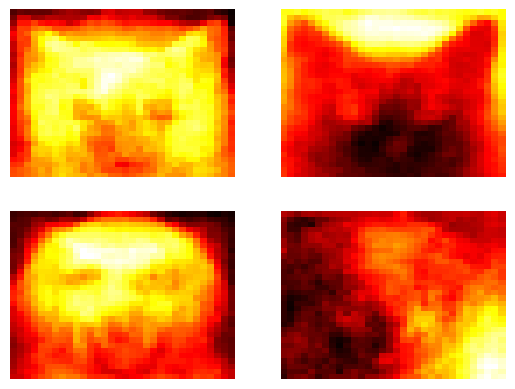

In [3]:
# plot 4 eigen vectors for normal dog and cat images 
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(64,64)))
    U2 = U[::2,::2]
    axs[j].pcolor(np.rot90(U2),cmap='hot')
    axs[j].axis('off')

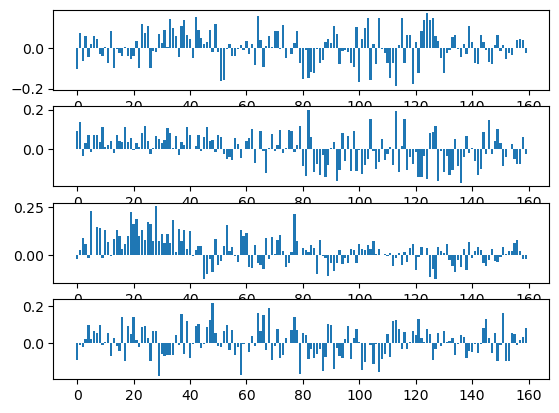

In [4]:
# plot the projection of each image (160 images) onto the first 4 eign-vectors 
fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s)),vT[j,:])

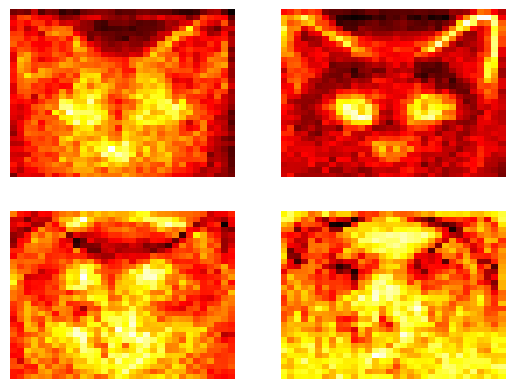

In [5]:
# plot 4 eigen faces for dog and cat faces in wavelet domain 
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U3 = np.flipud(np.reshape(u2[:,j],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

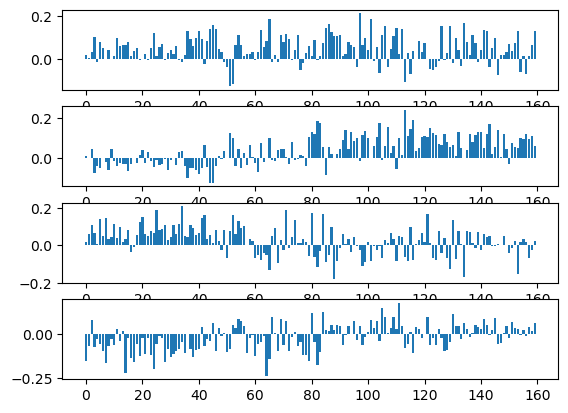

In [6]:
# projects all dogs and cats onto the 4 eigen face basis 

fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s2)),vT2[j,:])

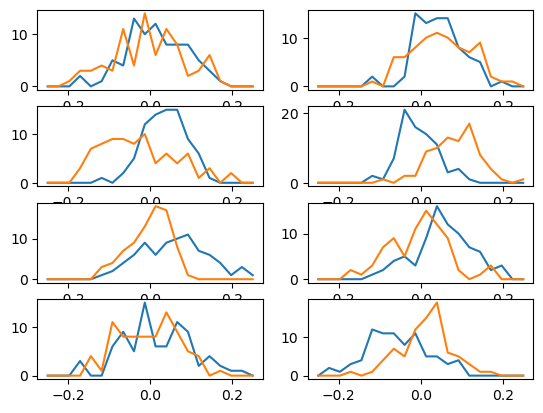

In [7]:
# plot the histograms of loadings along 4 PCA (left -> normal basis, right ->wavelet basis)

xbin = np.linspace(-0.25,0.25,20)
bin_width =  xbin[1] - xbin[0]
xbin_edges = np.append(xbin,xbin[-1] + bin_width) - bin_width/2 
fig,axs = plt.subplots(4,2)
for j in range(4):
    pdf1 = np.histogram(vT[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vT[j,80:],bins=xbin_edges)[0]
    axs[j,0].plot(xbin,pdf1)
    axs[j,0].plot(xbin,pdf2)
    
    pdf1 = np.histogram(vT2[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vT2[j,80:],bins=xbin_edges)[0]
    axs[j,1].plot(xbin,pdf1)
    axs[j,1].plot(xbin,pdf2)

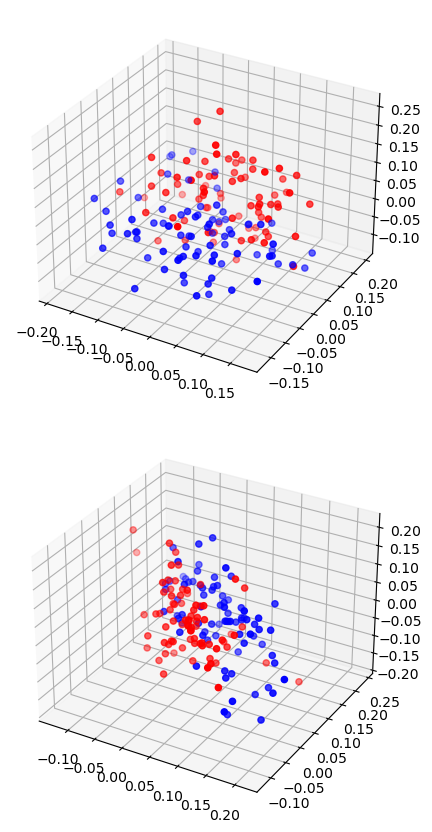

In [8]:
# plot dogs and cats against first three principle axes 
plt.rcParams['figure.figsize'] = [5, 20]
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(vT[0,:80],vT[1,:80],vT[2,:80],c='r',marker='o',s=20)
ax1.scatter(vT[0,80:],vT[1,80:],vT[2,80:],c='b',marker='o',s=20)

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(vT2[0,:80],vT2[1,:80],vT2[2,:80],c='r',marker='o',s=20)
ax2.scatter(vT2[0,80:],vT2[1,80:],vT2[2,80:],c='b',marker='o',s=20)

plt.show()